In [100]:
## Libraries Used
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

data_dir = 'data'
train = pd.read_csv(f'{data_dir}/train.csv')
train["path"] = train["path"].apply(lambda path: f"{data_dir}/{path}")

train.head()

,path,participant_id,sequence_id,sign
0,data/train_landmark_files/26734/1000035562.par...,26734,1000035562,blow
1,data/train_landmark_files/28656/1000106739.par...,28656,1000106739,wait
2,data/train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,data/train_landmark_files/25571/1000210073.par...,25571,1000210073,bird
4,data/train_landmark_files/62590/1000240708.par...,62590,1000240708,owie


### This is the file we will be looking at. Feel free to change the directory to any of the files available to visualize them as well.
* The y values all seem to be inverted, so inverting them back shows the video right side up.

In [101]:
## Change this directory to any file
path_idx = 2
sign = pd.read_parquet(train.iloc[path_idx].path)
sign.head()
sign.y = sign.y * -1

In [114]:
POSE = [
    489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501,
    502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514,
    515, 516, 517, 518, 519, 520, 521
]

In [115]:
len(POSE)

33

### These two functions return the coordinate values with connecting lines for hands and pose.

In [83]:
def get_hand_points(hand):
    x = [[hand.iloc[0].x, hand.iloc[1].x, hand.iloc[2].x, hand.iloc[3].x, hand.iloc[4].x], # Thumb
         [hand.iloc[5].x, hand.iloc[6].x, hand.iloc[7].x, hand.iloc[8].x], # Index
         [hand.iloc[9].x, hand.iloc[10].x, hand.iloc[11].x, hand.iloc[12].x], 
         [hand.iloc[13].x, hand.iloc[14].x, hand.iloc[15].x, hand.iloc[16].x], 
         [hand.iloc[17].x, hand.iloc[18].x, hand.iloc[19].x, hand.iloc[20].x], 
         [hand.iloc[0].x, hand.iloc[5].x, hand.iloc[9].x, hand.iloc[13].x, hand.iloc[17].x, hand.iloc[0].x]]

    y = [[hand.iloc[0].y, hand.iloc[1].y, hand.iloc[2].y, hand.iloc[3].y, hand.iloc[4].y],  #Thumb
         [hand.iloc[5].y, hand.iloc[6].y, hand.iloc[7].y, hand.iloc[8].y], # Index
         [hand.iloc[9].y, hand.iloc[10].y, hand.iloc[11].y, hand.iloc[12].y],
         [hand.iloc[13].y, hand.iloc[14].y, hand.iloc[15].y, hand.iloc[16].y],
         [hand.iloc[17].y, hand.iloc[18].y, hand.iloc[19].y, hand.iloc[20].y],
         [hand.iloc[0].y, hand.iloc[5].y, hand.iloc[9].y, hand.iloc[13].y, hand.iloc[17].y, hand.iloc[0].y]] 
    return x, y

def get_pose_points(pose):
    x = [[pose.iloc[8].x, pose.iloc[6].x, pose.iloc[5].x, pose.iloc[4].x, pose.iloc[0].x, pose.iloc[1].x, pose.iloc[2].x, pose.iloc[3].x, pose.iloc[7].x], 
         [pose.iloc[10].x, pose.iloc[9].x], 
         [pose.iloc[22].x, pose.iloc[16].x, pose.iloc[20].x, pose.iloc[18].x, pose.iloc[16].x, pose.iloc[14].x, pose.iloc[12].x, 
          pose.iloc[11].x, pose.iloc[13].x, pose.iloc[15].x, pose.iloc[17].x, pose.iloc[19].x, pose.iloc[15].x, pose.iloc[21].x], 
         [pose.iloc[12].x, pose.iloc[24].x, pose.iloc[26].x, pose.iloc[28].x, pose.iloc[30].x, pose.iloc[32].x, pose.iloc[28].x], 
         [pose.iloc[11].x, pose.iloc[23].x, pose.iloc[25].x, pose.iloc[27].x, pose.iloc[29].x, pose.iloc[31].x, pose.iloc[27].x], 
         [pose.iloc[24].x, pose.iloc[23].x]
        ]

    y = [[pose.iloc[8].y, pose.iloc[6].y, pose.iloc[5].y, pose.iloc[4].y, pose.iloc[0].y, pose.iloc[1].y, pose.iloc[2].y, pose.iloc[3].y, pose.iloc[7].y], 
         [pose.iloc[10].y, pose.iloc[9].y], 
         [pose.iloc[22].y, pose.iloc[16].y, pose.iloc[20].y, pose.iloc[18].y, pose.iloc[16].y, pose.iloc[14].y, pose.iloc[12].y, 
          pose.iloc[11].y, pose.iloc[13].y, pose.iloc[15].y, pose.iloc[17].y, pose.iloc[19].y, pose.iloc[15].y, pose.iloc[21].y], 
         [pose.iloc[12].y, pose.iloc[24].y, pose.iloc[26].y, pose.iloc[28].y, pose.iloc[30].y, pose.iloc[32].y, pose.iloc[28].y], 
         [pose.iloc[11].y, pose.iloc[23].y, pose.iloc[25].y, pose.iloc[27].y, pose.iloc[29].y, pose.iloc[31].y, pose.iloc[27].y], 
         [pose.iloc[24].y, pose.iloc[23].y]
        ]
    return x, y

### This animation shows the entire body and uses all points available in each frame's data. 
* The points for hands and pose were connected using information from mediapipe. 
* The face is simply shown as dots on their respective coordinates. 
* Link to pose article: https://google.github.io/mediapipe/solutions/pose.html
* Link to hands article: https://google.github.io/mediapipe/solutions/hands.html

In [84]:
sign.frame.unique()

array([103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,
       207], dtype=int16)

In [85]:
frame = sign[sign.frame==111]
get_hand_points(frame[frame.type=="right_hand"])

([[nan, nan, nan, nan, nan],
  [nan, nan, nan, nan],
  [nan, nan, nan, nan],
  [nan, nan, nan, nan],
  [nan, nan, nan, nan],
  [nan, nan, nan, nan, nan, nan]],
 [[nan, nan, nan, nan, nan],
  [nan, nan, nan, nan],
  [nan, nan, nan, nan],
  [nan, nan, nan, nan],
  [nan, nan, nan, nan],
  [nan, nan, nan, nan, nan, nan]])

The sign being shown here is: cloud


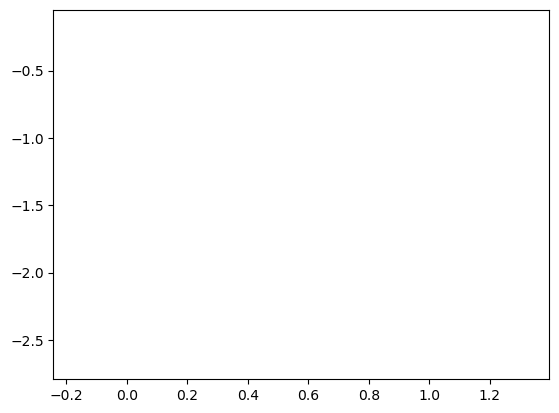

In [90]:
def animation_frame(f, face=True, pose=True, hands=True):
    assert face or pose or hands
    ax.clear()
    
    frame = sign[sign.frame==f]
    
    # Hands
    if hands:
        left = frame[frame.type=='left_hand'].fillna(2.0)
        right = frame[frame.type=='right_hand'].fillna(2.0)
        lx, ly = get_hand_points(left)
        rx, ry = get_hand_points(right)

        for i in range(len(lx)):
            ax.plot(lx[i], ly[i])
        for i in range(len(rx)):
            ax.plot(rx[i], ry[i])
    
    # Pose
    if pose:
        pose = frame[frame.type=='pose']
        px, py = get_pose_points(pose)

        for i in range(len(px)):
            ax.plot(px[i], py[i])
    
    # Face
    if face:
        face = frame[frame.type=='face'][['x', 'y']].values
        
        ax.plot(face[:,0], face[:,1], '.')
        
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    
        
print(f"The sign being shown here is: {train.iloc[path_idx].sign}")

## These values set the limits on the graph to stabilize the video
xmin = sign.x.min() - 0.2
xmax = sign.x.max() + 0.2
ymin = sign.y.min() - 0.2
ymax = sign.y.max() + 0.2

# fig, ax = plt.subplots()
# l, = ax.plot([], [])
anim = FuncAnimation(fig, func=animation_frame, frames=sign.frame.unique())

HTML(anim.to_html5_video())

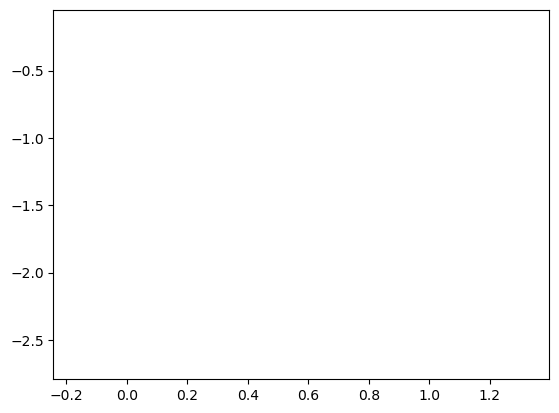

In [89]:
f = "video_something.mp4"
writervideo = animation.FFMpegWriter(fps=10) 
anim.save(f, writer=writervideo)

### This is another animation, this time just of the left hand. 
* Some frames are missing data, so these are dropped to make the video smooth. 
* Some files have more missing data than others, and you may want to keep all frames for continuity.
* Reload the sign file if you wish to re-run the full body animation with all the data again. 

The sign being shown here is: cloud


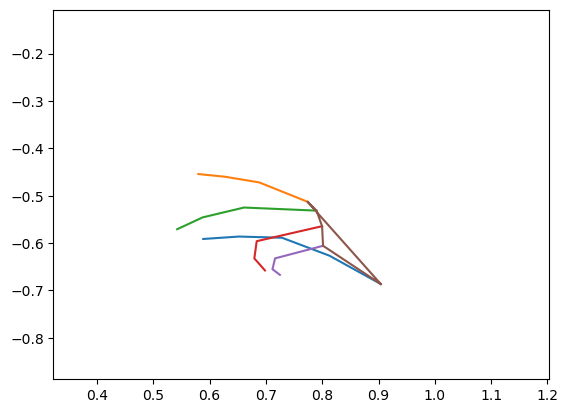

In [76]:
sign = sign[sign.type=='left_hand'].dropna()
def animation_frame(f):
    frame = sign[sign.frame==f]
    left = frame[frame.type=='left_hand']
    lx, ly = get_hand_points(left)
    ax.clear()
    for i in range(len(lx)):
        ax.plot(lx[i], ly[i])
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

        
print(f"The sign being shown here is: {train.iloc[path_idx].sign}")

## These values set the limits on the graph to stabilize the video
xmin = sign.x.min() - 0.2
xmax = sign.x.max() + 0.2
ymin = sign.y.min() - 0.2
ymax = sign.y.max() + 0.2

fig, ax = plt.subplots()
l, = ax.plot([], [])
animation = FuncAnimation(fig, func=animation_frame, frames=sign.frame.unique())

HTML(animation.to_html5_video())